In [ ]:
from google.colab import files

uploaded = files.upload()


Saving comments.csv to comments.csv


In [ ]:
import pandas as pd

df = pd.read_csv('comments.csv',encoding='latin-1')
print(df.head())

                                                text  classification
0   There's some very hate able teams this year #MKR             0.0
1  RT @The_Eccles: "Everyone underestimated us" \...             0.0
2  RT @NOTLukeDarcy: did @Channel7 or #MKR actual...             0.0
3  No, you don't. @Shut_Up_Jeff: I thought of a r...             1.0
4  RT @Wateronatrain: @MT8_9 You might like this ...             1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14880 entries, 0 to 14879
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            14879 non-null  object 
 1   classification  14877 non-null  float64
dtypes: float64(1), object(1)
memory usage: 232.6+ KB


In [ ]:
df2 = pd.DataFrame(data={'comments': df['text'], 'new_comments': df['text']})
df2.head()

,comments,new_comments
0,There's some very hate able teams this year #MKR,There's some very hate able teams this year #MKR
1,"RT @The_Eccles: ""Everyone underestimated us"" \...","RT @The_Eccles: ""Everyone underestimated us"" \..."
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...","No, you don't. @Shut_Up_Jeff: I thought of a r..."
4,RT @Wateronatrain: @MT8_9 You might like this ...,RT @Wateronatrain: @MT8_9 You might like this ...


The first pre-processing step we will do is transform all comments into lower case and create a new column new_commemts.

In [ ]:
df['new_comments'] = df['text'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,There's some very hate able teams this year #MKR,there's some very hate able teams this year #mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...","rt @the_eccles: ""everyone underestimated us"" w..."
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt @notlukedarcy: did @channel7 or #mkr actual...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...","no, you don't. @shut_up_jeff: i thought of a r..."
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt @wateronatrain: @mt8_9 you might like this ...


lets remove contractions.from index 4 comment we have a contraction. ex:it's is it is and he'd is he would

In [ ]:
!pip install contractions

In [ ]:
import contractions
df['new_comments']=df['new_comments'].apply(lambda x:contractions.fix(x))
df2['new_comments']=df['new_comments']
df2.head(50)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year #mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...","rt @the_eccles: ""everyone underestimated us"" w..."
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt @notlukedarcy: did @channel7 or #mkr actual...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...","no, you do not. @shut_up_jeff: i thought of a ..."
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt @wateronatrain: @mt8_9 you might like this ...
5,RT @kholly265: I bet the campers vote strategi...,rt @kholly265: i bet the campers vote strategi...
6,@EvvyKube it is absurd how much of my amazon w...,@evvykube it is absurd how much of my amazon w...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt @daniellevlee: colin is obviously malnouris...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,@newscoverup @rjennromao @gbabeuf @davidjo5295...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...","rt @metalbarbiedoll: but yea, apparently #game..."


Lets remove punctuation marks

In [ ]:
df['new_comments'] = df['new_comments'].str.replace(r'[^\w\s]', '', regex=True)
df2['new_comments']=df['new_comments']
df2.head(50)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us we st...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy did channel7 or mkr actually c...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",no you do not shut_up_jeff i thought of a real...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt8_9 you might like this htt...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly265 i bet the campers vote strategica...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube it is absurd how much of my amazon wi...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin is obviously malnourishe...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo52951945...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll but yea apparently gamergat...


From above output line 7 has the comment as "He is disgusting with a disgusting ideology. ðŸ¤®".So there are still some characters left so lets encode them and find out what they are and clean the data.

In [ ]:
# Replace unencodable characters with a placeholder
df['new_comments'] = df['new_comments'].apply(lambda x: x.encode('latin1', errors='replace').decode('utf-8', errors='replace'))
df2['new_comments'] = df['new_comments']
df2.head(20)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us we st...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy did channel7 or mkr actually c...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",no you do not shut_up_jeff i thought of a real...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt8_9 you might like this htt...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly265 i bet the campers vote strategica...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube it is absurd how much of my amazon wi...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin is obviously malnourishe...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo52951945...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll but yea apparently gamergat...


As it is replacing the unwanted character with  '�' this one we will further replace this with an empty string using replace function

In [ ]:
df['new_comments'] = df['new_comments'].apply(lambda x: x.encode('latin1', errors='replace').decode('utf-8', errors='replace').replace('�', '') )
df2['new_comments'] = df['new_comments']
df2.head(8)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us we st...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy did channel7 or mkr actually c...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",no you do not shut_up_jeff i thought of a real...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt8_9 you might like this htt...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly265 i bet the campers vote strategica...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube it is absurd how much of my amazon wi...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin is obviously malnourishe...


As this is not working lets use regex to remove this

In [ ]:
df['new_comments'] = df['new_comments'].str.replace(r'[^\w\s]', '', regex=True)
df2['new_comments']=df['new_comments']
df2.head(50)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us we st...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy did channel7 or mkr actually c...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",no you do not shut_up_jeff i thought of a real...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt8_9 you might like this htt...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly265 i bet the campers vote strategica...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube it is absurd how much of my amazon wi...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin is obviously malnourishe...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo52951945...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll but yea apparently gamergat...


Successfully we removed all the special characters and unwanted characters but there are still some numbers lets remove them too

In [ ]:
df['new_comments']=df['new_comments'].apply(lambda x:''.join([i for i in x if not i.isdigit()]))
df2['new_comments']=df['new_comments']
df2.head(50)

,comments,new_comments
0,There's some very hate able teams this year #MKR,there is some very hate able teams this year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us we st...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy did channel or mkr actually ch...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",no you do not shut_up_jeff i thought of a real...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt_ you might like this httpt...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly i bet the campers vote strategically...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube it is absurd how much of my amazon wi...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin is obviously malnourishe...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo novoros...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll but yea apparently gamergat...


In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['new_comments']=df['new_comments'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
df2['new_comments']=df['new_comments']
df2.head(50)


,comments,new_comments
0,There's some very hate able teams this year #MKR,hate able teams year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimated us still...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy channel mkr actually check peo...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",shut_up_jeff thought really funny joke promise...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt_ might like httptcocmpfmfj...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly bet campers vote strategicallyat lea...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube absurd much amazon wish list consists...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin obviously malnourished c...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo novoros...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll yea apparently gamergate wo...


lemmatization

In [ ]:
pip install langdetect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import spacy
from langdetect import detect,LangDetectException
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemm(comment):
  c = nlp(comment)
  return ' '.join(token.lemma_ for token in c)

In [ ]:
df['new_comments']=df['new_comments'].apply(lambda x: lemm(x))
df2['new_comments']=df['new_comments']
df2.head(50)

,comments,new_comments
0,There's some very hate able teams this year #MKR,hate able team year mkr
1,"RT @The_Eccles: ""Everyone underestimated us"" \...",rt the_eccles everyone underestimate we still ...
2,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,rt notlukedarcy channel mkr actually check peo...
3,"No, you don't. @Shut_Up_Jeff: I thought of a r...",shut_up_jeff think really funny joke promise s...
4,RT @Wateronatrain: @MT8_9 You might like this ...,rt wateronatrain mt _ might like httptcocmpfmf...
5,RT @kholly265: I bet the campers vote strategi...,rt kholly bet camper vote strategicallyat leas...
6,@EvvyKube it is absurd how much of my amazon w...,evvykube absurd much amazon wish list consist ...
7,RT @DanielleVLee: Colin is obviously malnouris...,rt daniellevlee colin obviously malnourish coo...
8,@NewsCoverUp @RJennromao @GBabeuf @DavidJo5295...,newscoverup rjennromao gbabeuf davidjo novoros...
9,"RT @MetalBarbieDoll: But yea, apparently #Game...",rt metalbarbiedoll yea apparently gamergate wo...


In [ ]:
data={'pre_comments':df['new_comments'],'classification':df['classification']}
df4=pd.DataFrame(data)
df4.head()

,pre_comments,classification
0,hate able team year mkr,0.0
1,rt the_eccles everyone underestimate we still ...,0.0
2,rt notlukedarcy channel mkr actually check peo...,0.0
3,shut_up_jeff think really funny joke promise s...,1.0
4,rt wateronatrain mt _ might like httptcocmpfmf...,1.0


In [ ]:
df4.to_csv('preproccessed_comments.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
df = df.dropna(subset=['classification'])
df.at[140,'classification']=1
x=df['new_comments']
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train.head()

,new_comments
799,neilasaurus jimcramer thequinnspiracy create n...
8483,get insight indie gaming community tonight pee...
8594,mkr americans brit
6501,rt itsjust fake fuckmkr rig mkr
427,rt carlosnunez hmmm thor girl sexist hope get ...


In [ ]:
x.shape,y.shape

((14877,), (14877,))

In [ ]:
print(y_train.value_counts())

classification
0.0    8646
1.0    2511
Name: count, dtype: int64


In [ ]:
X_test.head()

,new_comments
12929,rt uberfeminist twitterfeminism protection rac...
3608,rt fee_bee _ responsible convincing girl prett...
6109,jaffaref women sport dumb gt pay watch women s...
10032,mikeprysner mcdonald see big user photoshoppe ...
8992,kat look smug can not even cook mkr


In [ ]:
y_test.value_counts()

,count
classification,
0.0,2855
1.0,865


In [ ]:
data={'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}
df_new=pd.DataFrame(data)

In [ ]:
df_new.to_csv('comments_testtrain.csv',index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer


# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


In [ ]:
#import pickle

In [ ]:
!pip install joblib==1.0.1
import joblib

In [ ]:

'''with open('vectorizer.pkl','wb') as file:
  pickle.dump(vectorizer,file)'''

"with open('vectorizer.pkl','wb') as file:\n  pickle.dump(vectorizer,file)"

In [ ]:
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [ ]:
X_train_vec.shape,X_test_vec.shape

((11157, 17556), (3720, 17556))

In [ ]:
X_train.value_counts()

,count
new_comments,
harmlesstree httpstcoxwjzpsodgj,11
mkr,7
mkr view httptcoddfpzeejj,2
stfu drasko mkr,2
melbiebs halalflaws biebervalue greenlinerzjm tell quran say,2
...,...
rt xdannock mkr rob dave freakin legend,1
mkr um cooking show see well first damn dish ever cook,1
yeah one inexplicable reason jay_fj go ahead call sexist inept women httptcooahejcdm,1


In [ ]:
# Now use the transformed data for training
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
'''import pickle
with open('lr.pkl','wb') as file:
  pickle.dump(lr,file)'''


"import pickle\nwith open('lr.pkl','wb') as file:\n  pickle.dump(lr,file)"

In [ ]:
joblib.dump(lr, 'lr_model.joblib')

['lr_model.joblib']

In [ ]:
#now lets predict for test data
y_pred=lr.predict(X_test_vec)
pred_df=pd.DataFrame(data={'tested_comments':X_test,'y_predicted':y_pred,'y_actual':y_test})
pred_df.head()

,tested_comments,y_predicted,y_actual
12929,rt uberfeminist twitterfeminism protection rac...,0.0,1.0
3608,rt fee_bee _ responsible convincing girl prett...,1.0,1.0
6109,jaffaref women sport dumb gt pay watch women s...,1.0,1.0
10032,mikeprysner mcdonald see big user photoshoppe ...,0.0,0.0
8992,kat look smug can not even cook mkr,0.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_actul_arr=np.array(y_test)
y_pred_arr=np.array(y_pred)
cm=confusion_matrix(y_actul_arr,y_pred_arr)

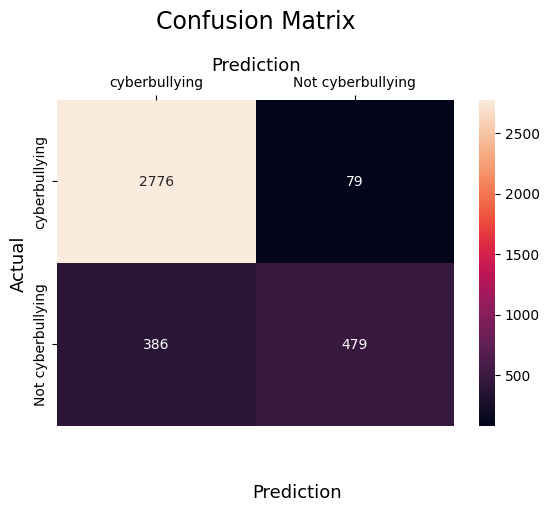

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [ ]:
print(classification_report(y_actul_arr, y_pred_arr))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2855
         1.0       0.86      0.55      0.67       865

    accuracy                           0.88      3720
   macro avg       0.87      0.76      0.80      3720
weighted avg       0.87      0.88      0.86      3720



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_vec,y_train)

RandomForestClassifier()

In [ ]:
y_rfc_pred=rfc.predict(X_test_vec)
y_rfc_pred_arr=np.array(y_rfc_pred)
cm=confusion_matrix(y_actul_arr,y_rfc_pred_arr)

In [ ]:
'''import pickle
with open('rfc.pkl','wb') as file:
  pickle.dump(rfc,file)'''

"import pickle\nwith open('rfc.pkl','wb') as file:\n  pickle.dump(rfc,file)"

In [ ]:
joblib.dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']

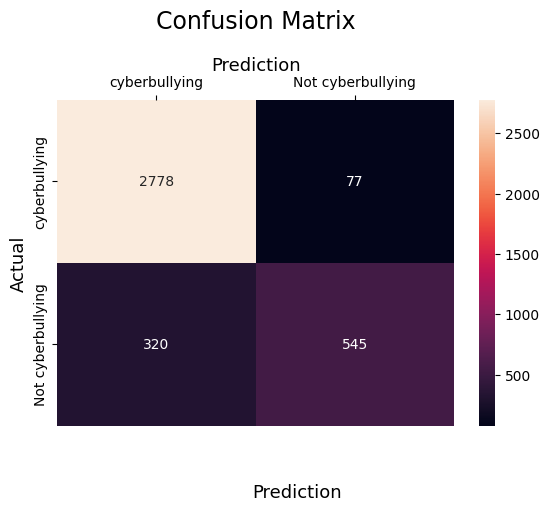

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [ ]:
accuracy_score(y_test, y_rfc_pred)

0.8932795698924731

In [ ]:
def predict_user_comment():
    """
    Function to take a user-input comment, preprocess it, and predict if it's cyberbullying or not
    using both Logistic Regression and Random Forest Classifier models.
    """
    import re
    from nltk.corpus import stopwords
    import spacy
    import pickle

    # Load pre-trained vectorizer and models
    with open('/content/vectorizer.pkl', 'rb') as vec_file:
        vectorizer = pickle.load(vec_file)

    with open('/content/lr.pkl', 'rb') as lr_model_file:
        lr_model = pickle.load(lr_model_file)
    with open('rfc.pkl', 'rb') as rfc_model_file:
        rfc_model = pickle.load(rfc_model_file)

    # Load English language model for Spacy
    nlp = spacy.load("en_core_web_sm")

    def preprocess_comment(comment):
        """
        Preprocess the input comment:
        1. Lowercasing
        2. Expanding contractions
        3. Removing special characters
        4. Removing numbers
        5. Removing stopwords
        6. Lemmatization
        """
        # Lowercase the text
        comment = comment.lower()

        # Expand contractions
        import contractions
        comment = contractions.fix(comment)

        # Remove special characters
        comment = re.sub(r'[^\w\s]', '', comment)

        # Remove numbers
        comment = ''.join([c for c in comment if not c.isdigit()])

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        comment = ' '.join([word for word in comment.split() if word not in stop_words])

        # Lemmatization
        doc = nlp(comment)
        comment = ' '.join(token.lemma_ for token in doc)

        return comment

    # Get comment from user
    user_comment = input("Enter a comment to classify (or type 'exit' to quit): ")
    if user_comment.lower() == 'exit':
        print("Exiting the prediction function. Goodbye!")
        return

    # Preprocess the comment
    preprocessed_comment = preprocess_comment(user_comment)

    # Vectorize the comment
    comment_vector = vectorizer.transform([preprocessed_comment])

    # Make predictions using both models
    lr_prediction = lr_model.predict(comment_vector)
    rfc_prediction = rfc_model.predict(comment_vector)

    # Labels for predictions
    lr_label = "Cyberbullying" if lr_prediction[0] == 1 else "Not Cyberbullying"
    rfc_label = "Cyberbullying" if rfc_prediction[0] == 1 else "Not Cyberbullying"

    # Display the results
    print("\n=== Prediction Results ===")
    print(f"Logistic Regression Prediction: {lr_label}")
    print(f"Random Forest Classifier Prediction: {rfc_label}")
    print(f"Preprocessed Comment: {preprocessed_comment}\n")
predict_user_comment()

Enter a comment to classify (or type 'exit' to quit): u freaky people

=== Prediction Results ===
Logistic Regression Prediction: Not Cyberbullying
Random Forest Classifier Prediction: Not Cyberbullying
Preprocessed Comment: freaky people



In [ ]:
from google.colab import files
files.download('vectorizer.joblib')
files.download('lr_model.joblib')
files.download('rfc_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
print(joblib.__version__)


1.0.1


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2
